In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")

## Null Data Check

In [3]:
# train data
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [4]:
# test data
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


age와 Cabin

train data에서 Embarked 총 3가지의 feature에서 null값이 확인됨.

<AxesSubplot:>

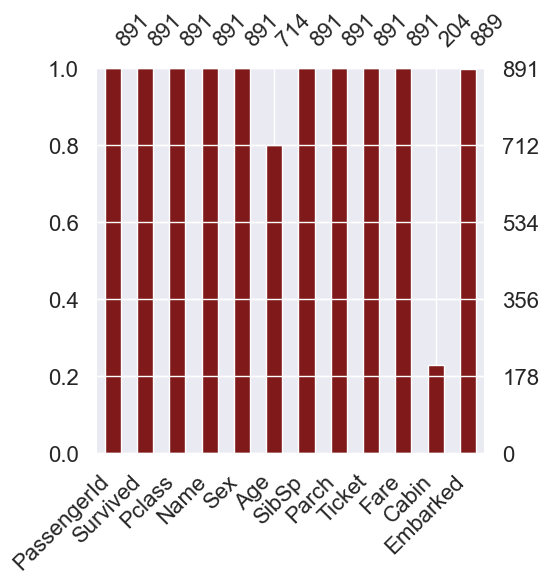

In [5]:
# train data
msno.bar(df=df_train.iloc[:, :], figsize=(5, 5), color=(0.5, 0.1, 0.1))

<AxesSubplot:>

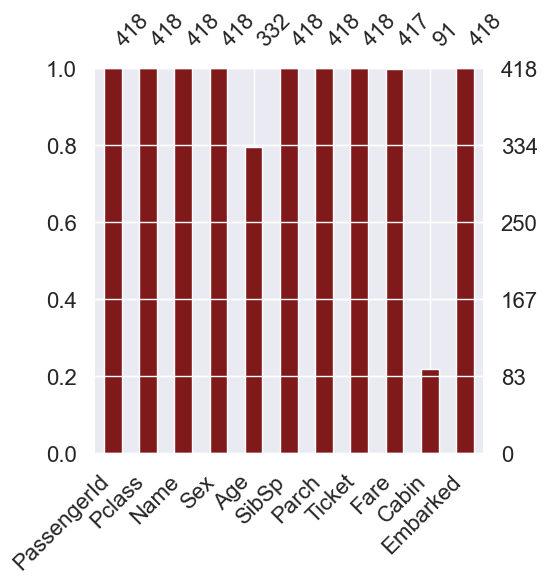

In [6]:
msno.bar(df=df_test.iloc[:, :], figsize=(5, 5), color=(0.5, 0.1, 0.1))

MANO 라이브러리를 통해 null 값을 더 쉽게 찾을 수 있다.

___

## Target Label Check

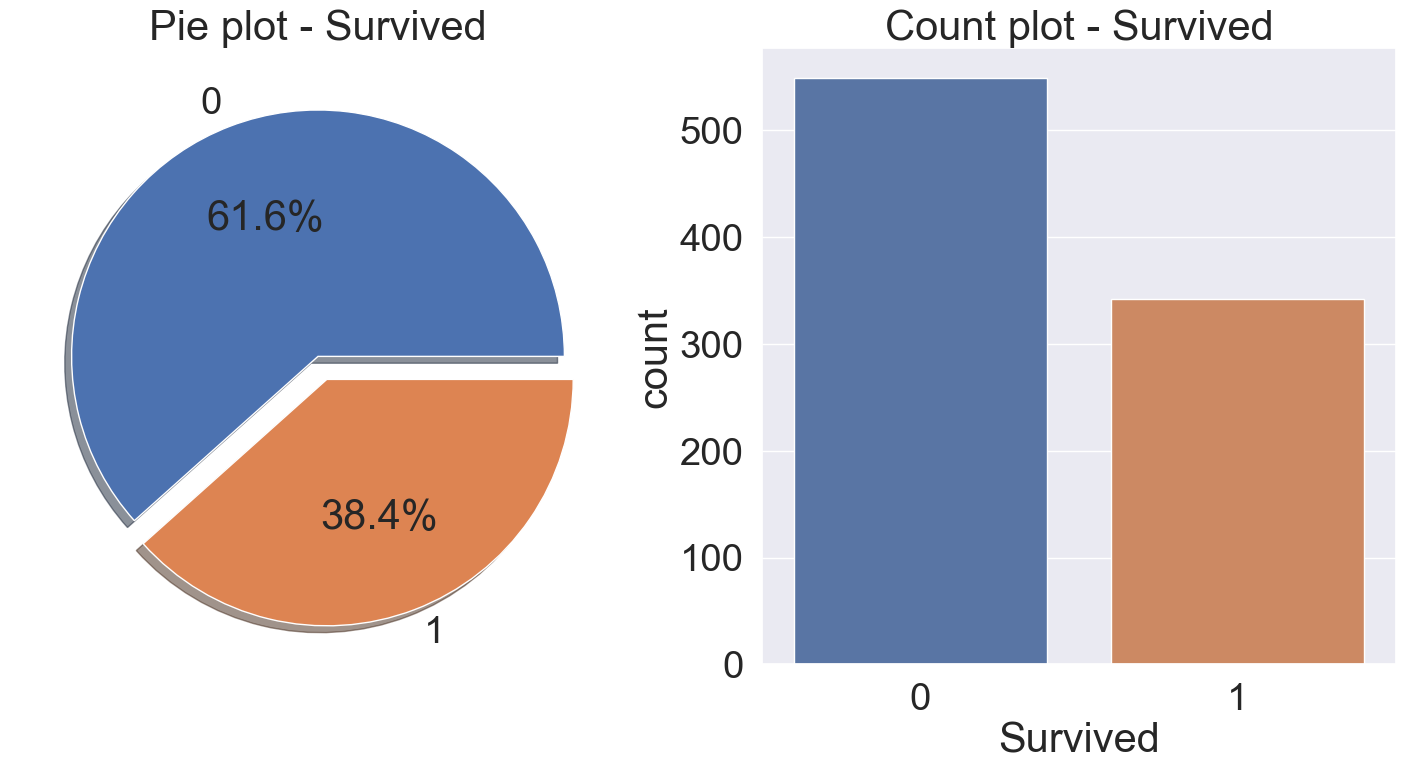

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

생존확률 38.4%
___

## Exploratory Data Analysis

Survived 값은 0,1로 


count를 이용하면 현재 데이터의 set 개수가 나오고


sum을 하면 생존한 인원수가 나온다. (0+1 = 1)

생존 확률에 영향을 끼치는 정도가 저조하다면 "!"를 feature앞에 붙여 구분할 것이다.

### Pclass

In [8]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [10]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Pclass의 값이 높을수록 생존 확률이 낮은것을 알 수 있다.

seaborn의 countplot을 이용하여 더 알아보기 쉽게 표현하자

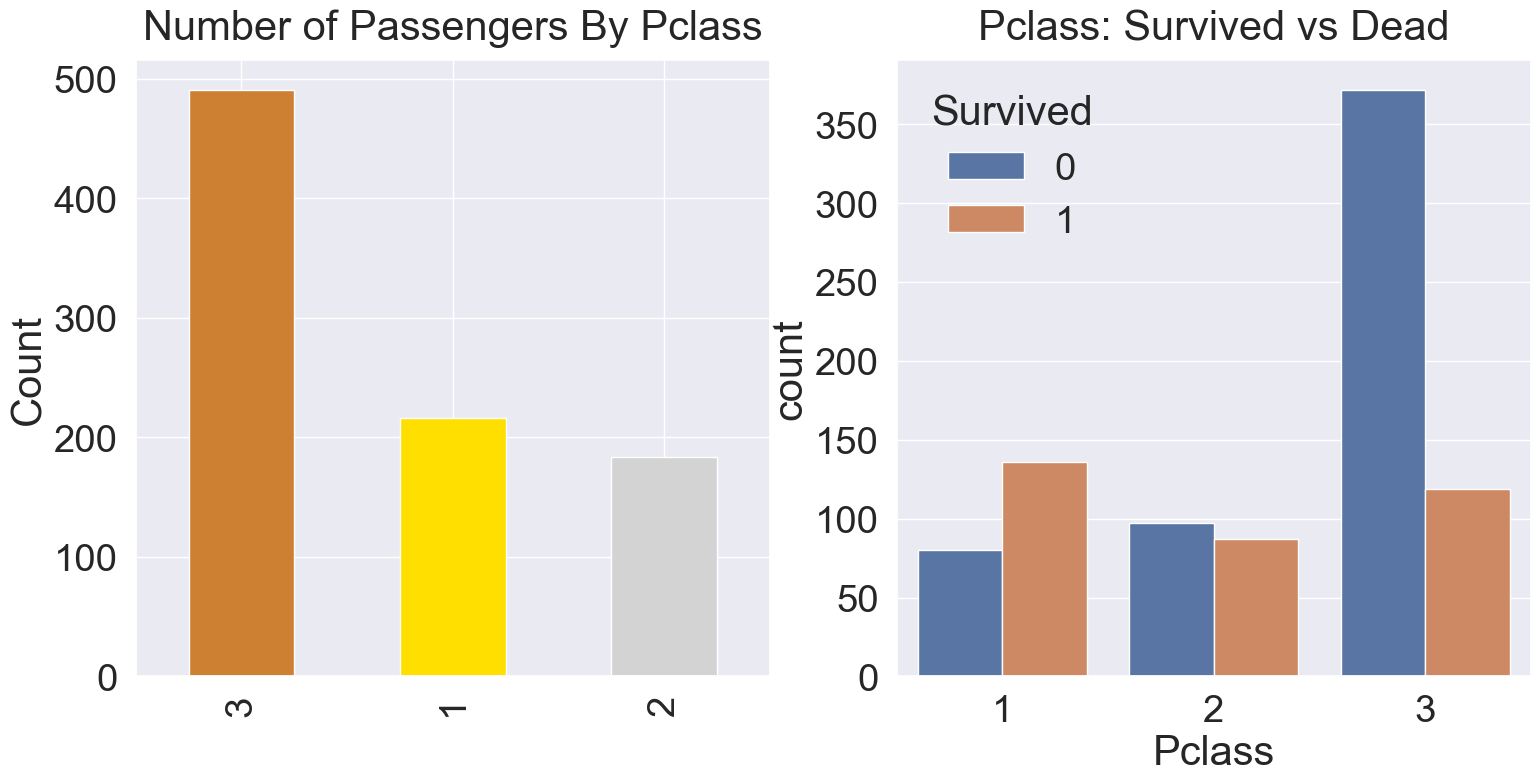

In [11]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


생존에 Pclass가 큰 영향을 준다는 것을 알 수 있다.

---

### Sex

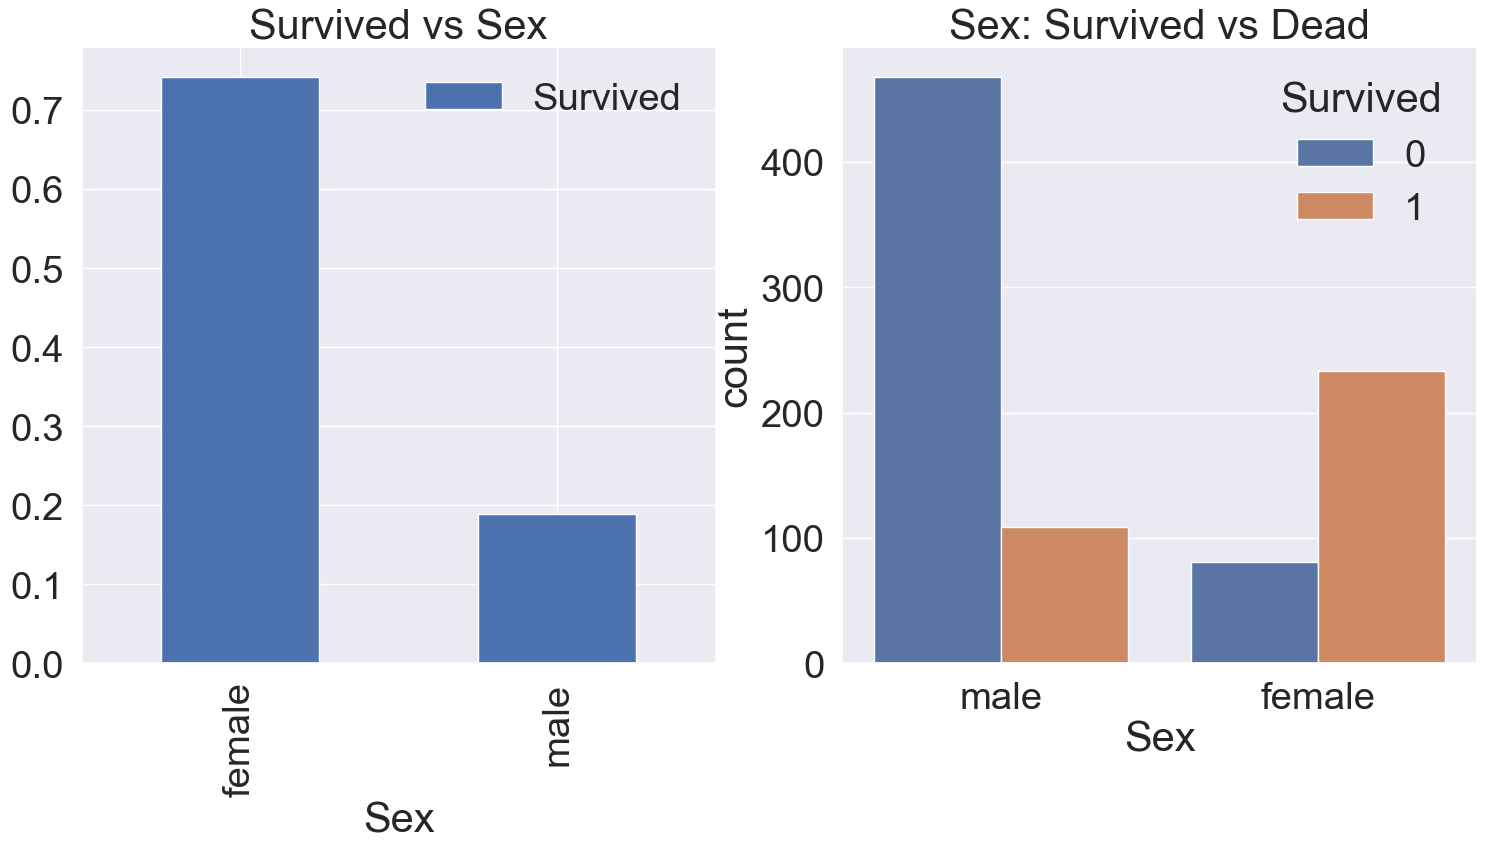

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


여성의 생존 확률이 매우 높다.

___

### Age

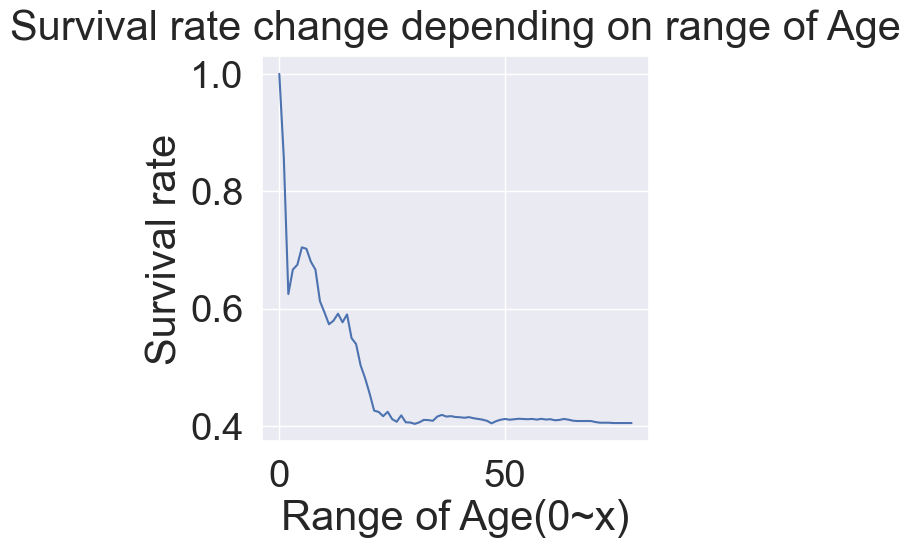

In [13]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(5, 5))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()


나이가 어릴수록 생존 확률이 높아진다.
___

### Embarked

<AxesSubplot:xlabel='Embarked'>

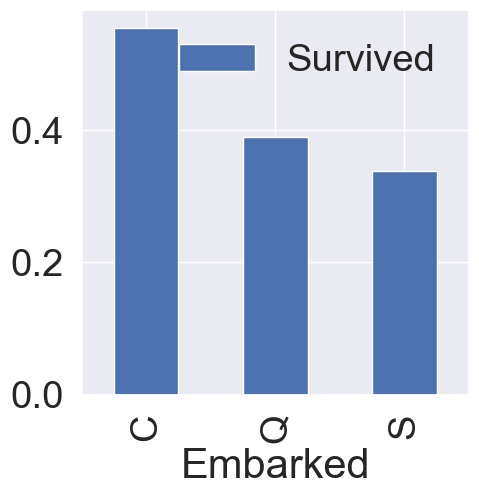

In [14]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)


비슷한 생존률을 보이나 C가 가장 높은 생존률을 보인다.

다른 feature들과 접목하여 확인할 필요성이 있다.

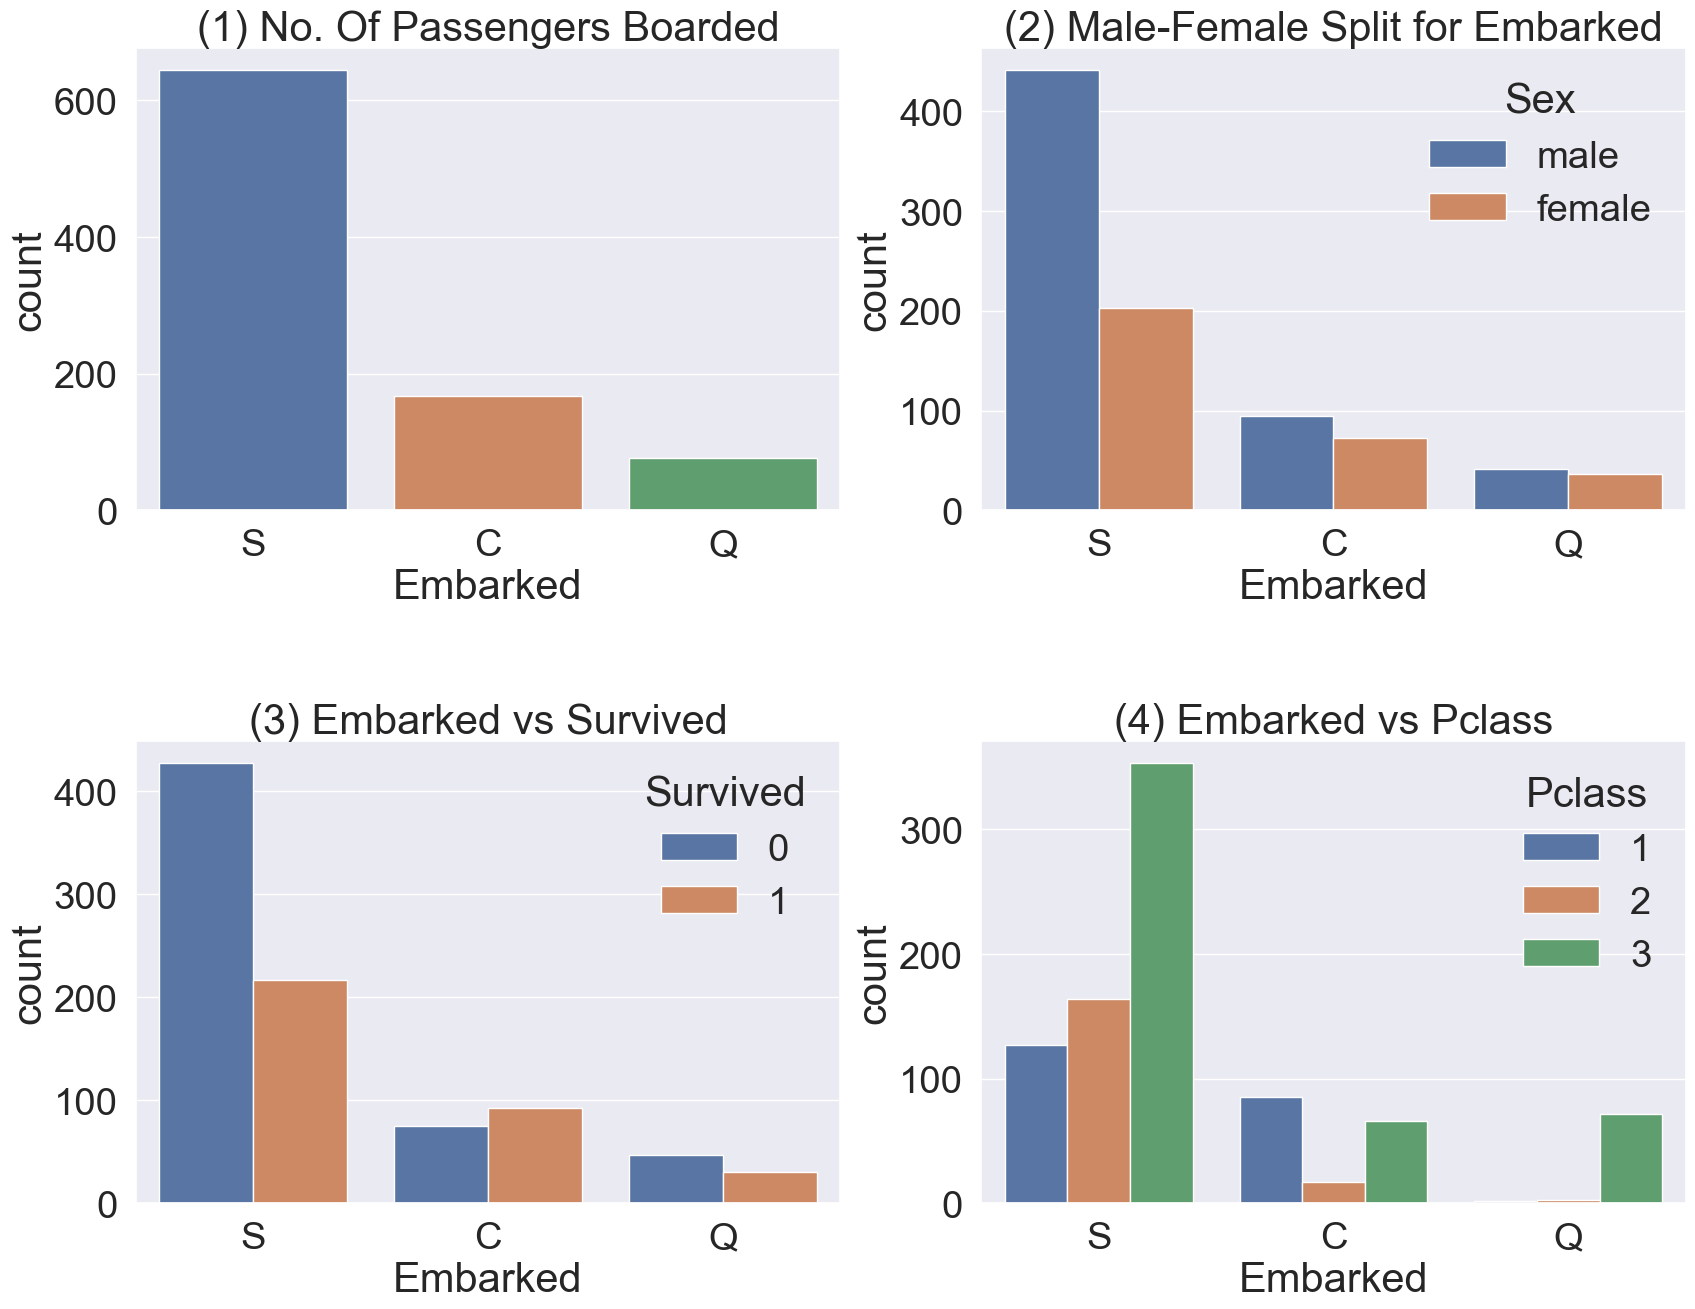

In [15]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

(1)은 항구별 탑승객 수

(2)는 항구별 탑승객의 성별의 수

(3)은 항구별 탑승객의 생존자와 사망자의 수

(4)는 항구별 Pclass의 수

위 그래프로 S항구에 Pclass가 3인 인원이 많이 탑승하였고, 그로인해 생존률과 사망률의 차이가 컸다.

___

### Family (= SibSp + Parch)

(가족 =형제,자매 + 부모,자녀) 로 생각하여 Family로 분석한다.

즉, 가족 구성원 수를 이용하여 분석한다.

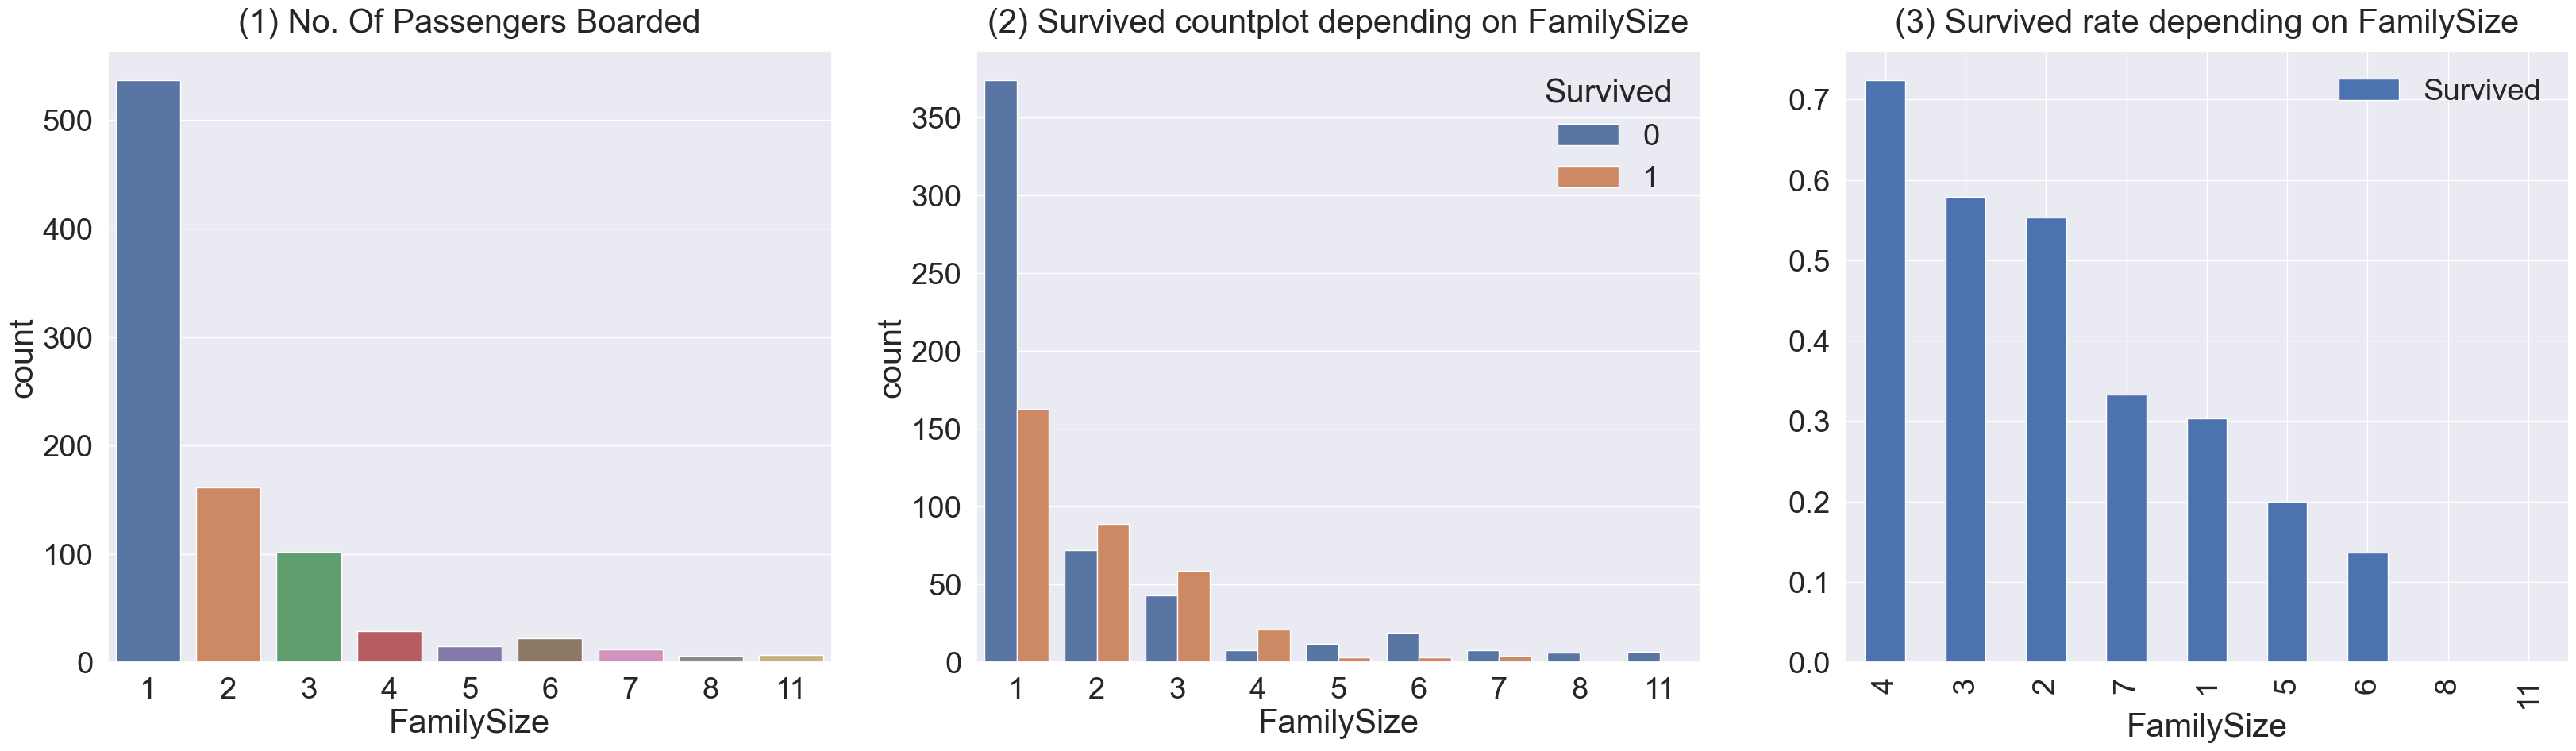

In [16]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함 +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함 +1

f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


(1) 그래프로 가족의 크기가 1~11까지 있음을 알수있다.

(2),(3) 그래프는 가족 크기별 생존,사망 비교로 구성원이 4명일때 가장 높은 생존 확률을 보인다.

___

### Fare

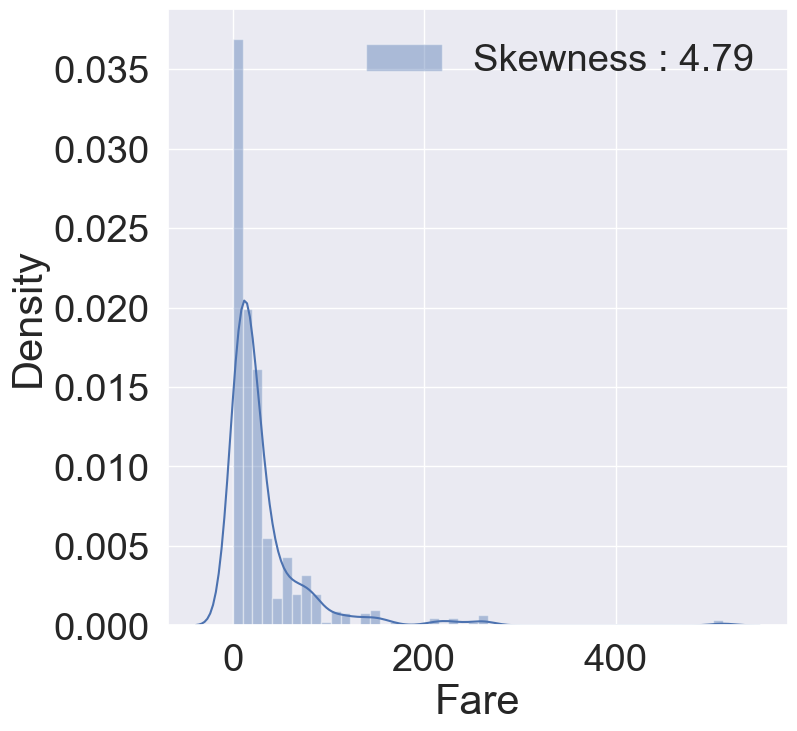

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')


매우 비대칭적인 feature.

outiler의 영향을 줄이기 위해 Fare에 log를 취한다.

lambda 함수를 이용하여 로그 적용함수 map에 인수로 넣어준다.

In [18]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 바꿈.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


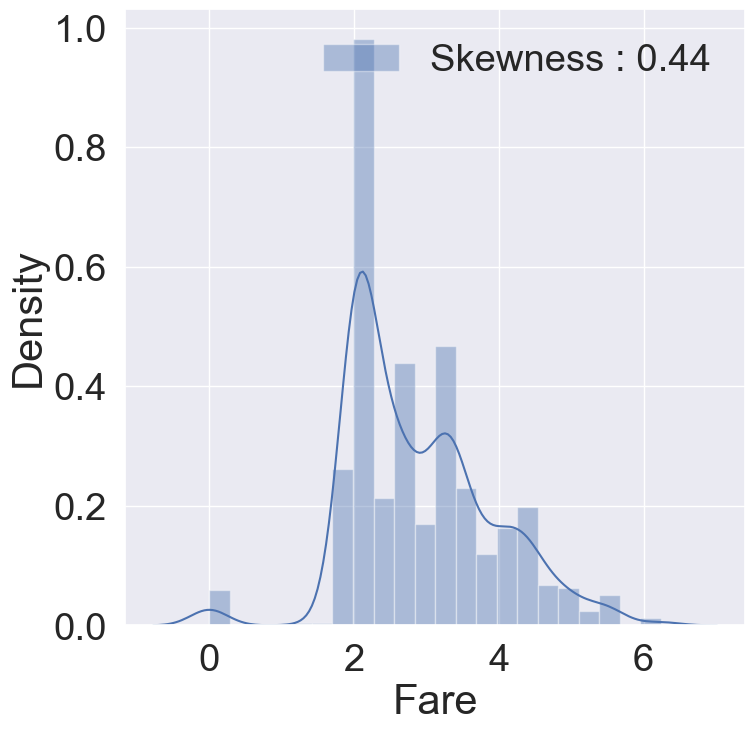

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')


Skewness가 4.79 -> 0.44 로 비대칭성 매우 줄어들었다.

___

### !Carbin

이 feature는 Null값이 대부분이므로 제외시킨다.

___

### !Ticket

이 데이터는 가격별로 측정할 수 있으나

결국 Fare의 특성과 같고, 숫자형 데이터가 아닌 String 이므로 제외시킨다.

___

### !Name

해당 데이터는 탑승객의 이름으로 필요없는 데이터로 판단되어 제외시킨다.
___

## Fill Null in Embarked

In [20]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


가장 많았던 데이터가 S 이므로 S로 채운다

In [21]:
df_train['Embarked'].fillna('S', inplace=True)

## Fill Null in Age

In [22]:
for i in range(len(cummulate_survival_ratio)):
    if cummulate_survival_ratio[i] > 0.49 and cummulate_survival_ratio[i] < 0.51:
         print(i , " : " , cummulate_survival_ratio[i])


18  :  0.5035971223021583


Age에서 null값은 생존률이 반반인 나이를 넣어 다른 feature들로 비교하게 만든다.

In [23]:
df_train["Age"].fillna(18.0, inplace=True)
df_test["Age"].fillna(18.0, inplace=True)

___

##  String to Numerical (Sex)

In [24]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})
df_train['Sex'].isnull().any()

False

___

## one-hot encoding on Embarked 

In [25]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

___

## Drop Columns

필요없는 Feature 지우기

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,1,0,0,1


In [27]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,3,0,0,1


In [29]:
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [30]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.981001,2,0,0,1
1,1,1,0,38.0,4.266662,2,1,0,0
2,1,3,0,26.0,2.070022,1,0,0,1
3,1,1,0,35.0,3.972177,2,0,0,1
4,0,3,1,35.0,2.085672,1,0,0,1


In [31]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,2.057860,1,0,1,0
1,3,0,47.0,1.945910,2,0,0,1
2,2,1,62.0,2.270836,1,0,1,0
3,3,1,27.0,2.159003,1,0,0,1
4,3,0,22.0,2.508582,3,0,0,1


___

# 학습진행

이전 튜토리얼에서 random forest가 가장 높은 성능을 보인 모델이므로 해당 모델을 채택한다.

In [32]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델 평가
from sklearn.model_selection import train_test_split

In [33]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [34]:

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)



In [35]:

model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [36]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.58% 정확도로 생존을 맞춤


___

# Feature importance 

In [37]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

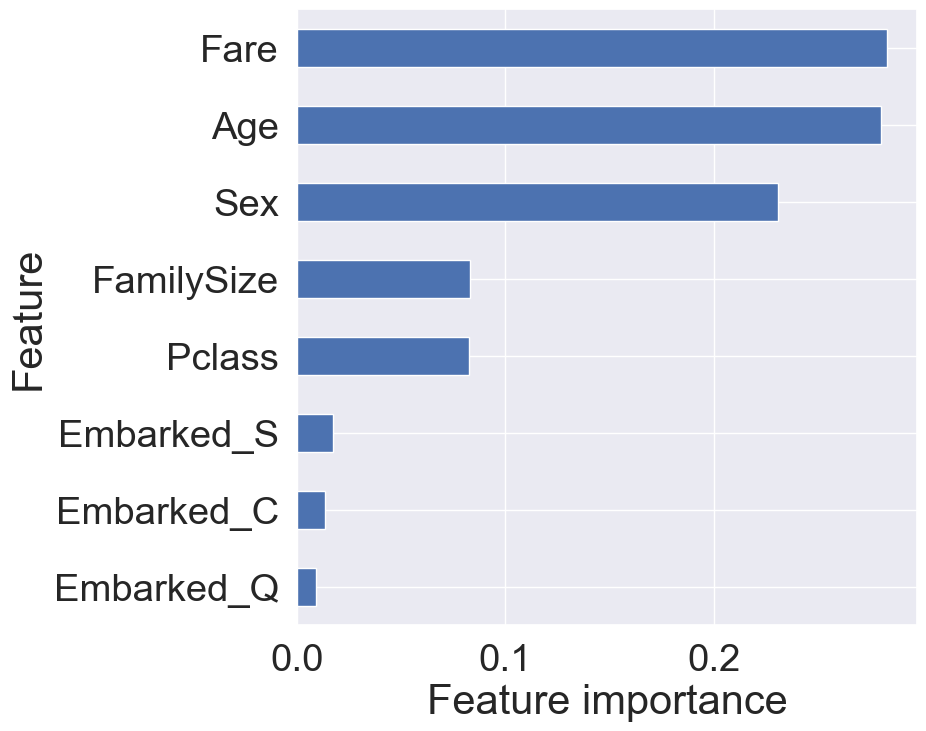

In [38]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [39]:
submission = pd.read_csv('./titanic/gender_submission.csv')

In [40]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [42]:
submission.to_csv('./titanic.csv', index=False)